In [1]:
!mecab -v
!mecab -D

mecab of 0.996

filename:	/usr/local/lib/mecab/dic/ipadic/sys.dic
version:	102
charset:	utf8
type:	0
size:	392126
left size:	1316
right size:	1316



In [2]:
!curl -O http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
!cat neko.txt | mecab > neko.txt.mecab

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0   943k      0  0:00:01 --:--:--  0:00:01 3559k


## 30. 形態素解析結果の読み込み

http://taku910.github.io/mecab/

>表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

問題文では1文を形態素(マッピング型)のリストにする、とあるので、全文はリストのリストにすれば良い？

In [3]:
all_text = []
with open('neko.txt.mecab') as f:
    sentence = []
    for line in f:
        if line == 'EOS\n':
            all_text.append(sentence[:])
            sentence = []
        else:
            morpheme = {}
            splited = [line.split('\t')[0]] + line.split('\t')[1].split(',')
            morpheme['surface']=splited[0]
            morpheme['base']=splited[7]
            morpheme['pos']=splited[1]
            morpheme['pos1']=splited[2]
            sentence.append(morpheme)
all_text[:4]

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'}],
 [],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]]

## 31. 動詞

In [4]:
verbs_surface = []
for sentence in all_text:
    for morpheme in sentence:
        if morpheme['pos']=='動詞':
            verbs_surface.append(morpheme['surface'])
verbs_surface[:5]

['生れ', 'つか', 'し', '泣い', 'し']

## 32. 動詞の原形

In [5]:
verbs_base = []
for sentence in all_text:
    for morpheme in sentence:
        if morpheme['pos']=='動詞':
            verbs_base.append(morpheme['base'])
verbs_base[:5]            

['生れる', 'つく', 'する', '泣く', 'する']

## 33. サ変名詞

In [6]:
noun_sahen=[]
for sentence in all_text:
    for morpheme in sentence:
        if morpheme['pos']=='名詞' and morpheme['pos1']=='サ変接続':
            noun_sahen.append(morpheme['surface'])
noun_sahen[:5]

['見当', '記憶', '話', '装飾', '突起']

## 34. 「AのB」

センスの良いやり方とは思えないけど・・

In [7]:
anob = []
for sentence in all_text:
    buf = ""
    no = False
    for morpheme in sentence:
        if morpheme['pos']=='名詞':
            if no:
                anob.append(buf+'の'+morpheme['surface'])
            buf = morpheme['surface']
            no  = False
        elif buf!="" and morpheme['surface']=='の' and morpheme['pos']=='助詞':
            no = True
anob[:5]   

['彼の掌', '掌の上', '書生の顔', 'ものの始', 'はずの顔']

## 35. 名詞の連接

In [8]:
nouns_list = []
for sentence in all_text:
    nouns = []
    for morpheme in sentence:
        if morpheme['pos']=='名詞':
            nouns.append(morpheme['surface'])
        else:
            if len(nouns) > 1:
                nouns_list.append(''.join(nouns))
            nouns = []
nouns_list[:10]

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']

## 36. 単語の出現頻度

Counterを使っていく

https://docs.python.jp/3/library/collections.html#collections.Counter

In [9]:
from collections import Counter
# 基本形で集計
word_counter = Counter()
for sentence in all_text:
    for morpheme in sentence:
        word_counter[morpheme['base']] += 1
top10 = word_counter.most_common(10)
top10

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337)]

## 37. 頻度上位10語

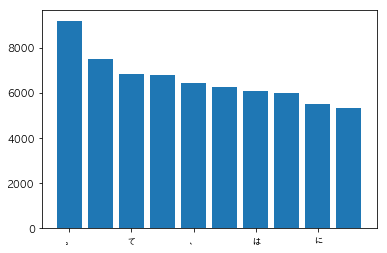

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' #日本語表示のため

fig,ax = plt.subplots()
rect1 = ax.bar(range(10),[x[1] for x in top10])
ax.set_xticklabels([x[0] for x in top10])

plt.show()

## 38. ヒストグラム

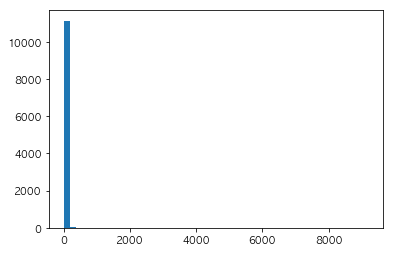

In [11]:
fig,ax = plt.subplots()
ax.hist([val for key,val in word_counter.items()],50)
plt.show()

## 39. Zipfの法則

https://ja.wikipedia.org/wiki/ジップの法則

>ジフの法則とは、出現頻度が k 番目に大きい要素が全体に占める割合が 1/k に比例するという経験則である。

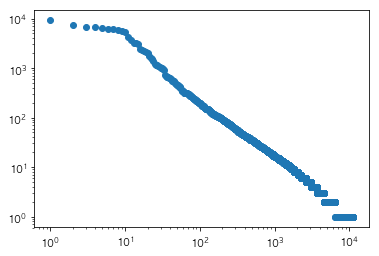

In [12]:
fig, ax = plt.subplots()
y = [x[1] for x in word_counter.most_common()]
x = range(1,len(y)+1)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.scatter(x,y)
plt.show()

ほんとだ！